In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
#CODING NEURON
inputs = [[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,3.3,-0.8]]
weights = [ [0.2,0.8,-0.5,1.0],
            [0.5,-0.91,0.26,-0.5],
            [-0.26,-0.27,0.17,0.87],]
biases2 = [-1,2,-0.5]
biases = [2.0,3.0,0.5]
weights2 = [ [0.1,-0.14,0.5],
            [-0.5,0.12,-0.33],
            [-0.44,0.73,-0.13],]
layer1_outputs = np.dot(inputs,np.array(weights).T)+biases

layer2_outputs = np.dot(layer1_outputs,np.array(weights2))+biases2

print(layer1_outputs,  layer2_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]] [[-2.1744   3.21425  1.19065]
 [ 0.707    0.6828   4.5213 ]
 [-1.39594  1.9477  -0.14521]]


In [78]:

class Layer_Dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights = 0.10 *np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs,self.weights)+self.biases

class Activation_Relu:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)


In [79]:
import nnfs

In [80]:
nnfs.init()

In [81]:
from nnfs.datasets import spiral_data

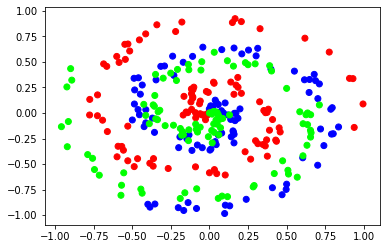

In [15]:



plt.scatter(X[:,0], X[:,1],c=y, cmap="brg")
plt.show()

In [82]:
def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y


In [83]:
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):

        # get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

In [84]:
np.random.seed(0)
X, y = create_data(100,3)
layer1 = Layer_Dense(2,3)
layer2 = Layer_Dense(3,3)
activation1 = Activation_Relu()
layer1.forward(X)
activation1.forward(layer1.output)
activation2 = Activation_Softmax()
layer2.forward(activation1.output)
activation2.forward(layer2.output)
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.forward(activation2.output, y)
# Calculate accuracy from output of activation2 and targets
predictions = np.argmax(activation2.output, axis=1)  # calculate values along first axis
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)
print(loss)




acc: 0.34
1.0984450276692708


In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [85]:
class Loss_CategoricalCrossentropy:

    def forward(self, y_pred, y_true):  # y_true should be in format [1,0,0] ( 1 for right class , 0 for wrong ones)

        # Number of samples in a batch
        samples = len(y_pred)

        # Probabilities for target values
        y_pred = y_pred[range(samples), y_true]

        # Losses
        negative_log_likelihoods = -np.log(y_pred)

        # Average loss
        data_loss = np.sum(negative_log_likelihoods) / samples # Mean
        return data_loss


In [48]:
math.log(0.7)

-0.35667494393873245

In [67]:
#Random optimisation ( full random weights and biases)
 #Helper variables
lowest_loss = 9999999  # some initial value
best_layer1_weights = layer1.weights
best_layer1_biases = layer1.biases
best_layer2_weights = layer2.weights
best_layer2_biases = layer2.biases
# Random iteration with calculating the least loss
for iteration in range(100000):

    # Generate a new set of weights for iteration
    layer1.weights = 0.05 * np.random.randn(2, 3)
    layer1.biases = 0.05 * np.random.randn(1, 3)
    layer2.weights = 0.05 * np.random.randn(3, 3)
    layer2.biases = 0.05 * np.random.randn(1, 3)

    # Make a forward pass of the training data through this layer
    layer1.forward(X)
    activation1.forward(layer1.output)
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    # Calculate loss (from activation output, softmax activation here) and accuracy
    loss = loss_function.forward(activation2.output, y)
    predictions = np.argmax(activation2.output, axis=1)  # calculate values along first axis
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
        best_layer1_weights = layer1.weights
        best_layer1_biases = layer1.biases
        best_layer2_weights = layer2.weights
        best_layer2_biases = layer2.biases
        lowest_loss = loss


New set of weights found, iteration: 0 loss: 1.0983352661132812 acc: 0.38
New set of weights found, iteration: 47 loss: 1.0983258056640626 acc: 0.3566666666666667
New set of weights found, iteration: 758 loss: 1.0982578531901042 acc: 0.33
New set of weights found, iteration: 1089 loss: 1.0981203206380208 acc: 0.38
New set of weights found, iteration: 4352 loss: 1.098033650716146 acc: 0.3433333333333333
New set of weights found, iteration: 7101 loss: 1.0978054809570312 acc: 0.34


In [87]:

#Random optimisation №2 , adjusting values in certain direction, revert if loss increase
lowest_loss = 9999999  # some initial value
best_layer1_weights = layer1.weights
best_layer1_biases = layer1.biases
best_layer2_weights = layer2.weights
best_layer2_biases = layer2.biases

for iteration in range(10000):

    # Generate a new set of weights for iteration
    layer1.weights += 0.05 * np.random.randn(2, 3)
    layer1.biases += 0.05 * np.random.randn(1, 3)
    layer2.weights += 0.05 * np.random.randn(3, 3)
    layer2.biases += 0.05 * np.random.randn(1, 3)

    # Make a forward pass of the training data through this layer
    layer1.forward(X)
    activation1.forward(layer1.output)
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    # Calculate loss (from activation output, softmax activation here) and accuracy
    loss = loss_function.forward(activation2.output, y)
    predictions = np.argmax(activation2.output, axis=1)  # calculate values along first axis
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
        best_layer1_weights = layer1.weights
        best_layer1_biases = layer1.biases
        best_layer2_weights = layer2.weights
        best_layer2_biases = layer2.biases
        lowest_loss = loss
    else: #Reversion
        layer1.weights = best_layer1_weights
        layer1.biases = best_layer1_biases
        layer2.weights = best_layer2_weights
        layer2.biases = best_layer2_biases
#ENCOUNTER PROBLEM CONNECTED WITH JUPYTERLAB , METHOD IS NOT RELIABLE ANYWAY


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


New set of weights found, iteration: 901 loss: 21.573196614583335 acc: 0.31333333333333335
New set of weights found, iteration: 902 loss: 21.547106119791668 acc: 0.31333333333333335
New set of weights found, iteration: 903 loss: 21.525667317708333 acc: 0.31
New set of weights found, iteration: 904 loss: 21.389269205729168 acc: 0.31333333333333335
New set of weights found, iteration: 905 loss: 21.060724283854167 acc: 0.30666666666666664
New set of weights found, iteration: 941 loss: 20.90427083333333 acc: 0.30333333333333334
New set of weights found, iteration: 942 loss: 20.617693684895833 acc: 0.31
New set of weights found, iteration: 944 loss: 20.17513671875 acc: 0.3
New set of weights found, iteration: 945 loss: 19.99554524739583 acc: 0.3
New set of weights found, iteration: 965 loss: 19.330680338541665 acc: 0.2833333333333333
New set of weights found, iteration: 968 loss: 19.325986328125 acc: 0.2833333333333333
New set of weights found, iteration: 969 loss: 19.040247395833333 acc: 0

In [1]:
import numpy as np

inputs = np.array([[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]])  # now we have 3 samples (feature sets) of data
weights = np.array([[0.2, 0.8, -0.5, 1], # now we have 3 sets of weights - one set for each neuron
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T
biases = np.array([[2], [3], [0.5]]).T  # one bias for each neuron

# Forward pass
layer_outputs = np.dot(inputs, weights) + biases  # forward pass thru Dense layer
relu_outputs = np.maximum(0, layer_outputs)  # forward pass thru ReLU activation

# Let's optimize and test backpropagation here
# ReLU activation
relu_dvalues = np.ones(relu_outputs.shape) # simulates derivative with respect to input values from next layer passed to current layer during backpropagation
relu_dvalues[layer_outputs <= 0] = 0
drelu = relu_dvalues

# Dense layer
dinputs = np.dot(drelu, weights.T)  # dinputs - multiply by weights
dweights = np.dot(inputs.T, drelu)  # dweights - multiply by inputs
dbiases = np.sum(drelu, axis=0, keepdims=True)  # dbiases - sum values, do this over samples (first axis), keepdims as this by default will produce a plain list - we discussed this earlier

# Update parameters
weights += -0.001 * dweights
biases += -0.001 * dbiases



In [34]:
import numpy as np
import random

random.seed(0)
np.random.seed(0)


# Our sample dataset
def create_data(n, k):
    X = np.zeros((n*k, 2))  # data matrix (each row = single example)
    y = np.zeros(n*k, dtype='uint8')  # class labels
    for j in range(k):
        ix = range(n*j, n*(j+1))
        r = np.linspace(0.0, 1, n)  # radius
        t = np.linspace(j*4, (j+1)*4, n) + np.random.randn(n)*0.2  # theta
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = j
    return X, y


# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, inputs, neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from input ones, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dvalues = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from input ones
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable, 
        # let's make a copy of values first
        self.dvalues = dvalues.copy()

        # Zero gradient where input values were negative 
        self.dvalues[self.inputs <= 0] = 0 


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        self.dvalues = dvalues.copy()


# Cross-entropy loss
class Loss_CategoricalCrossentropy:

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = y_pred.shape[0]

        # Probabilities for target values - only if categorical labels
        if len(y_true.shape) == 1:
            y_pred = y_pred[range(samples), y_true]

        # Losses
        negative_log_likelihoods = -np.log(y_pred)

        # Mask values - only for one-hot encoded labels
        if len(y_true.shape) == 2:
            negative_log_likelihoods *= y_true

        # Overall loss
        data_loss = np.sum(negative_log_likelihoods) / samples
        return data_loss

    # Backward pass
    def backward(self, dvalues, y_true):

        samples = dvalues.shape[0]

        self.dvalues = dvalues.copy()  # Copy so we can safely modify
        self.dvalues[range(samples), y_true] -= 1
        self.dvalues = self.dvalues / samples
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.current_learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = (self.beta_1 * layer.weight_momentums +
                                 (1 - self.beta_1) * layer.dweights)
        layer.bias_momentums = (self.beta_1 * layer.bias_momentums +
                               (1 - self.beta_1) * layer.dbiases)
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = (layer.weight_momentums /
            (1 - self.beta_1 ** (self.iterations + 1)))
        bias_momentums_corrected = (layer.bias_momentums /
            (1 - self.beta_1 ** (self.iterations + 1)))
        # Update cache with squared current gradients
        layer.weight_cache = (self.beta_2 * layer.weight_cache +
            (1 - self.beta_2) * layer.dweights**2)
        layer.bias_cache = (self.beta_2 * layer.bias_cache +
            (1 - self.beta_2) * layer.dbiases**2)
        # Get corrected cachebias
        weight_cache_corrected = (layer.weight_cache /
            (1 - self.beta_2 ** (self.iterations + 1)))
        bias_cache_corrected = (layer.bias_cache /
            (1 - self.beta_2 ** (self.iterations + 1)))

        # Vanilla SGD parameter update + normalization with square rooted cache
        layer.weights += (-self.current_learning_rate *
                         weight_momentums_corrected /
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon))
        layer.biases += (-self.current_learning_rate *
                         bias_momentums_corrected /
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon))

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


# Create dataset
X, y = create_data(100, 3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 64)  # first dense layer, 2 inputs (each sample has 2 features), 3 outputs

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)  # second dense layer, 3 inputs, 3 outputs

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.0575, decay=1e-8)

# Train in loop
for epoch in range(10001):

    # Make a forward pass of our training data thru this layer
    dense1.forward(X)

    # Make a forward pass thru activation function - we take output of previous layer here
    activation1.forward(dense1.output)

    # Make a forward pass thru second Dense layer - it takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Make a forward pass thru activation function - we take output of previous layer here
    activation2.forward(dense2.output)

    # Calculate loss from output of activation2 so softmax activation
    loss = loss_function.forward(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    predictions = np.argmax(activation2.output, axis=1)  # calculate values along first axis
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}, lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dvalues)
    dense2.backward(activation2.dvalues)
    activation1.backward(dense2.dvalues)
    dense1.backward(activation1.dvalues)

    # Update weights
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

        
        

epoch: 0, acc: 0.360, loss: 1.099, lr: 0.0575
epoch: 100, acc: 0.753, loss: 0.607, lr: 0.05749715382138749
epoch: 200, acc: 0.787, loss: 0.479, lr: 0.057488558646061005
epoch: 300, acc: 0.863, loss: 0.353, lr: 0.0574742170579969
epoch: 400, acc: 0.893, loss: 0.293, lr: 0.05745413336430066
epoch: 500, acc: 0.900, loss: 0.260, lr: 0.05742831359305091
epoch: 600, acc: 0.920, loss: 0.230, lr: 0.05739676549028411
epoch: 700, acc: 0.920, loss: 0.208, lr: 0.05735949851612153
epoch: 800, acc: 0.930, loss: 0.201, lr: 0.05731652384004162
epoch: 900, acc: 0.920, loss: 0.200, lr: 0.05726785433530062
epoch: 1000, acc: 0.937, loss: 0.179, lr: 0.05721350457250595
epoch: 1100, acc: 0.943, loss: 0.172, lr: 0.057153490812346115
epoch: 1200, acc: 0.950, loss: 0.167, lr: 0.05708783099748289
epoch: 1300, acc: 0.953, loss: 0.160, lr: 0.05701654474361081
epoch: 1400, acc: 0.957, loss: 0.155, lr: 0.05693965332969104
epoch: 1500, acc: 0.957, loss: 0.150, lr: 0.05685717968736526
epoch: 1600, acc: 0.960, loss: 0

In [3]:
a = ['хуй', 'пизда', 'malafya']

In [14]:
msg = 'If u give a shit you r : {0},{1},{2}'.format('python',a[1],a[2])

In [15]:
msg

'If u give a shit you r : python,пизда,malafya'

In [16]:
a = ['first','second','third']
a =enumerate(a)

In [20]:
for i in a: 
    print (i)

(0, 'first')
(1, 'second')
(2, 'third')


In [22]:
a[1]

TypeError: 'enumerate' object is not subscriptable

In [27]:
a
answer = sorted(a.values())
answer[-1]

5

In [28]:
a = '12123123'

In [29]:
st = list(set(a))

In [30]:
st

['1', '2', '3']

In [50]:
def numerate(X):
    for i in range(len(X)-1):
        if X[i] == X[i+1]:
            return False
    return True
def alternate(s):
    st = list(set(s))
    max_length = 0
    for i in range(len(st)-1):
        for b in range(i+1,len(st)):
            local_list = [c for c in s if c==st[i] or c==st[b]]
            print(local_list)
            if numerate(local_list):
                max_length = max(len(local_list),max_length)
    return max_length
            
        
        

In [76]:
print(1+2)

3


In [79]:
def appendAndDelete(s, t, k):
    if len(s)+len(t) <=k:
        return 'Yes'
    if len(s)<len(t) and s == t[:len(s)]:
        if len(t)-len(s)==k:
            return 'Yes'
        if len(s)+len(t)<=k:
            return 'Yes'
        return 'No'
        
    for i in range (len(t)):
        if s[:len(t)-i] == t[:len(t)-i]:
            if k>=(len(s)-(len(t)+i))+i:
                return 'Yes'
            return 'No'

In [80]:
appendAndDelete('asdfqwertyuighjkzxcvasdfqwertyuighjkzxcvasdfqwertyuighjkzxcvasdfqwertyuighjkzxcvasdfqwertyuighjkzxcv','bsdfqwertyuighjkzxcvasdfqwertyuighjkzxcvasdfqwertyuighjkzxcvasdfqwertyuighjkzxcvasdfqwertyuighjkzxcv',100)

In [108]:
def continue_list(prev_number,difference,counter,st,diff):
    if counter == 1:
        st.add(prev_number+difference)
        return
    for i in range(2):
        continue_list(prev_number+difference,diff[i],counter-1,st,diff)
    return 
def stones(n, a, b):
    answer = set()
    diff = [a,b]
    continue_list(0,a,n-1,answer,diff)
    continue_list(0,b,n-1,answer,diff)
    return answer

In [110]:
stones(2,2,3)

{4, 5, 6}